Анастасия Плавина

### Тема: Дискретные случайные величины. Закон распределения вероятностей. Биномиальный закон распределения. Распределение Пуассона

#### Задача 1

Контрольная работа состоит из пяти вопросов. На каждый вопрос приведено четыре варианта ответа, один из которых правильный. Составьте закон распределения числа правильных ответов при простом угадывании. Найдите M(X), D(X).

$p(k=0) = C_n^kp^kq^{n-k} = C_5^0p^0q^5 = 0.2373$

$p(k=1) = C_n^kp^kq^{n-k} = C_5^1p^1q^4 = 0.3955$

$p(k=2) = C_n^kp^kq^{n-k} = C_5^2p^2q^3 = 0.2637$

$p(k=3) = C_n^kp^kq^{n-k} = C_5^3p^3q^2 = 0.0879$

$p(k=4) = C_n^kp^kq^{n-k} = C_5^4p^4q^1 = 0.0146$

$p(k=5) = C_n^kp^kq^{n-k} = C_5^5p^5q^0 = 0.0010$

$M(X) = np = 5 \cdot 0.25 = 1.25 $

$D(X) = npq = 1.25 \cdot 0.75 = 0.9375$

In [1]:
import math 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def combinations(n, k):
    return int(math.factorial(n) / (math.factorial(k) *  math.factorial(n-k)))

def p_binomial(n, k, p):
    q = 1 - p
    return combinations(n,k) * p**k * q**(n-k)

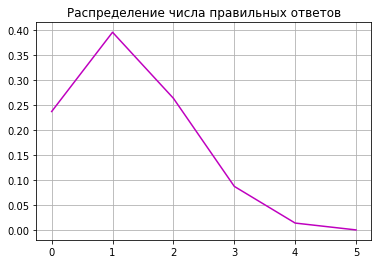

In [2]:
binomial_dist = []
n = 5
p_k = 0.25

for i in range (n+1):
    k = p_binomial(n, i, p_k)
    binomial_dist.append(k)

x = np.arange(0, n+1, 1)
y = binomial_dist

plt.plot(x, y, c='m')
plt.title('Распределение числа правильных ответов')
plt.grid()

In [3]:
df = pd.DataFrame(binomial_dist, index=range(0,6), columns = ['p'])
df

,p
0,0.237305
1,0.395508
2,0.263672
3,0.087891
4,0.014648
5,0.000977


#### Задача 2

Пользователь получает в среднем 10 писем со спамом на свой почтовый ящик за сутки. Найти число N, такое, что с вероятностью 0.95 пользователь получит не более N писем со спамом за текущий день.

In [4]:
lambda_ = 10
P_N = 0 
N= -1    

# складываем вероятности получить до N писем, пока не получим вероятность 0.95
while P_N < 0.95:
    N += 1
    P_N += (lambda_**N) / np.math.factorial(N) * np.exp(-lambda_)

print(N, P_N)

15 0.9512595966960214


Ответ: $N = 15$

#### Задача 3

Производятся выстрелы по мишени. Вероятность попадания в мишень при одном выстреле равна 0.01. Сколько выстрелов нужно сделать чтобы быть уверенным с вероятностью 0.9, что хотя бы 6 раз будет совершено попадание?

Подсказка. 1) "Вероятность попасть k раз при n выстрелах" - на какое распределение это похоже? 2) А если нам нужна вероятность P(X >= k), а не P(X = k)? 3) Здесь предстоит немножко покодить.

In [5]:
def p_binomial(n, k, p):
    q = 1 - p
    return combinations(n,k) * p**k * q**(n-k)

# вычитаем из единицы сумму вероятностей до 6 попаданий и получаем вероятность попасть более 6 раз 
def p_k_or_more_successes(n, k, p):
    res = 1
    for i in range(k):
        res -= p_binomial(n, i, p)
    return res


p = 0.01
k = 6
n = k

# ищем n
while p_k_or_more_successes(n, k, p) < 0.9:
    n += 1

print(n)

926


Ответ: 926 выстрелов